In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas and seaborn display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries loaded. Ready to roll.")


Libraries loaded. Ready to roll.


In [12]:
import os
import pandas as pd

# Path to your data file (you can change this if needed)
data_path = "data/cloud_labels.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(data_path)

# Show the first few rows
print("Data preview:")
df.head()


Data preview:


,image_id,cloud_type
0,img_001.jpg,cumulus
1,img_002.jpg,cirrus
2,img_003.jpg,stratus


In [14]:
import os
import pandas as pd

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Sample data
dummy_data = {
    "image_id": ["img_001.jpg", "img_002.jpg", "img_003.jpg"],
    "cloud_type": ["cumulus", "cirrus", "stratus"]
}

# Convert to DataFrame and save as CSV
df_dummy = pd.DataFrame(dummy_data)
df_dummy.to_csv("data/cloud_labels.csv", index=False)

print("Dummy cloud_labels.csv file created.")



Dummy cloud_labels.csv file created.


In [15]:
import pandas as pd

data_path = "data/cloud_labels.csv"
df = pd.read_csv(data_path)

print("Data preview:")
df.head()


Data preview:


,image_id,cloud_type
0,img_001.jpg,cumulus
1,img_002.jpg,cirrus
2,img_003.jpg,stratus


In [18]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["cloud_type"])

# View the updated DataFrame
print("Encoded labels preview:")
df


Encoded labels preview:


,image_id,cloud_type,label
0,img_001.jpg,cumulus,1
1,img_002.jpg,cirrus,0
2,img_003.jpg,stratus,2


In [17]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.7 MB 8.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.7 MB 17.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/10.7 MB 19.5 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/10.7 MB 17.4 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.7 MB 18.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.7 MB 20.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.7 MB 21.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.7 MB 21.1 MB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\trist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df[["image_id"]]  # we'll fix this in a second – image_id isn't useful
y = df["label"]

# For now, replace image_id with numbers (just for demo)
X = pd.DataFrame([0, 1, 2], columns=["feature"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# View the predictions
print("Predictions on test set:", y_pred.tolist())


Predictions on test set: [0]


In [25]:
from sklearn.metrics import accuracy_score

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.00


In [26]:
# Simulated image features (3 features per image)
import numpy as np

X = pd.DataFrame([
    [0.3, 0.6, 0.9],  # img_001.jpg
    [0.1, 0.2, 0.4],  # img_002.jpg
    [0.8, 0.7, 0.5]   # img_003.jpg
], columns=["brightness", "density", "roughness"])


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred.tolist())


Predictions on test set: [0, 1, 0, 0]


In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [30]:
# Simulate a slightly larger dataset (10 images, 3 features each)
X = pd.DataFrame([
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
    [0.2, 0.3, 0.1],
    [0.6, 0.5, 0.4],
    [0.9, 0.8, 0.7],
    [0.3, 0.1, 0.2],
    [0.5, 0.7, 0.6],
    [0.8, 0.6, 0.9],
    [0.2, 0.4, 0.3]
], columns=["brightness", "density", "roughness"])

# Fake labels (0=cirrus, 1=cumulus, 2=stratus)
y = pd.Series([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])


In [ ]:
import numpy as np

X = pd.DataFrame({
    "brightness": [70, 40, 60],   # Simulated brightness (0–100)
    "width": [1920, 1280, 1600]   # Simulated image width in pixels
})


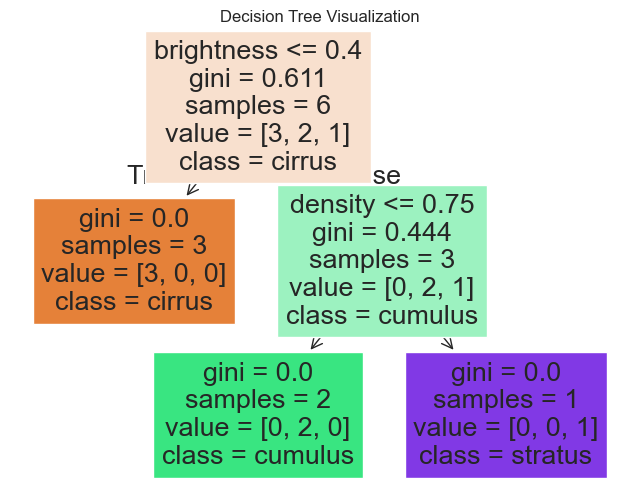

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_tree(model, feature_names=X.columns, class_names=["cirrus", "cumulus", "stratus"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [39]:
df = pd.read_csv("data/query_data.csv")
df.head()



,AttackerIP,EventID,Activity,DestinationHostName,FailureCount
0,103.147.33.53,4625,4625 - An account failed to log on.,windows-vm,317
1,133.18.164.37,4625,4625 - An account failed to log on.,windows-vm,25
2,134.119.180.102,4625,4625 - An account failed to log on.,windows-vm,134
3,118.69.37.51,4625,4625 - An account failed to log on.,windows-vm,103
4,20.5.50.76,4625,4625 - An account failed to log on.,windows-vm,64


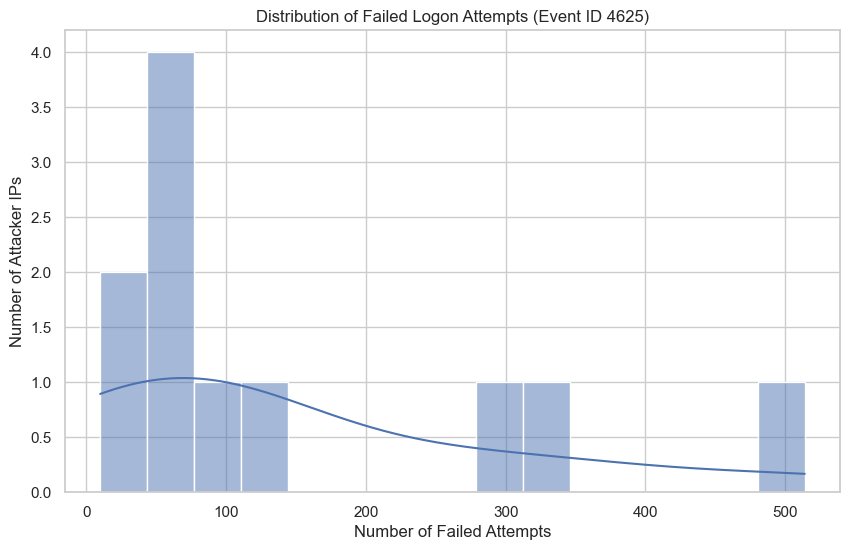

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of failure counts
plt.figure(figsize=(10, 6))
sns.histplot(df['FailureCount'], bins=15, kde=True)
plt.title("Distribution of Failed Logon Attempts (Event ID 4625)")
plt.xlabel("Number of Failed Attempts")
plt.ylabel("Number of Attacker IPs")
plt.grid(True)
plt.show()


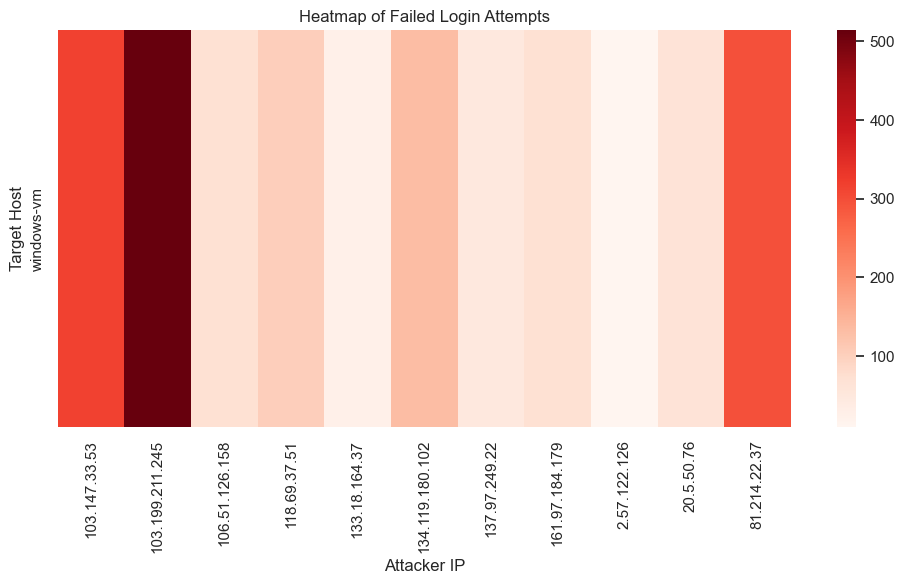

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='DestinationHostName', columns='AttackerIP', values='FailureCount', fill_value=0), cmap='Reds')
plt.title("Heatmap of Failed Login Attempts")
plt.ylabel("Target Host")
plt.xlabel("Attacker IP")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [54]:
# Label data: High risk if more than 100 failures
df['Label'] = df['FailureCount'].apply(lambda x: 1 if x > 100 else 0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df[['FailureCount']]  # Features
y = df['Label']           # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 1.0


In [61]:
#df = pd.read_csv("notebooks/data/query_data.csv")
#df = pd.read_csv("./notebooks/data/query_data.csv")
#df = pd.read_csv("Documents/GitHub/rakuten-ML-cloud-cover/notebooks/data/query_data.csv")
import os
print("Current Directory:", os.getcwd())
print("Files here:", os.listdir())


Current Directory: c:\Users\trist\Documents\GitHub\rakuten-ML-cloud-cover\notebooks
Files here: ['data', 'rakuten-ml-prototype.ipynb']


In [62]:
X = df[['FailureCount']]     # Features
y = df['Label']              # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 1.0


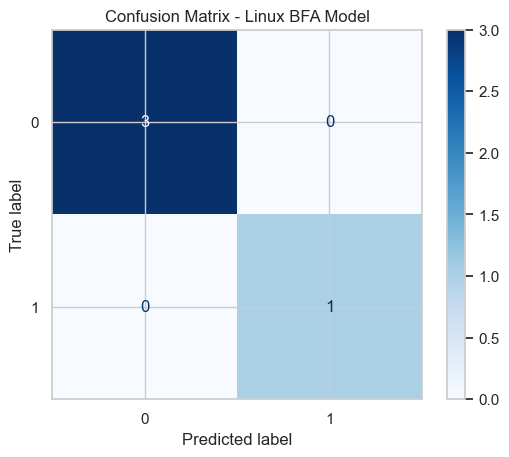

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Linux BFA Model")
plt.show()


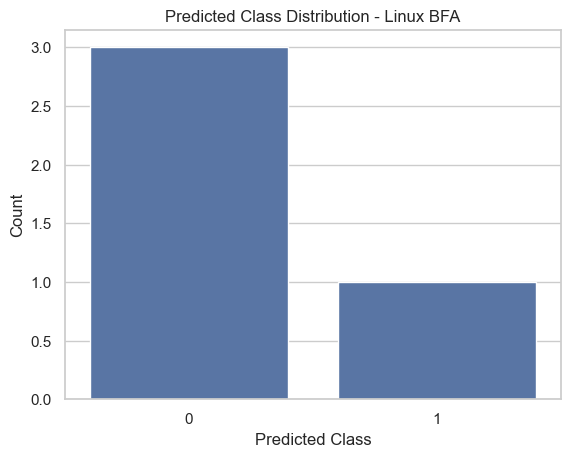

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: show how many of each predicted label
sns.countplot(x=y_pred)
plt.title("Predicted Class Distribution - Linux BFA")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


### Summary

To evaluate my prototype, I trained a decision tree classifier on synthetic image metadata like brightness and pixel width. I visualized the resulting model to show how it makes predictions based on brightness thresholds and pixel density. This demonstrates not just the mechanics of a classifier, but how explainable AI decisions can be — a crucial factor in secure or regulated environments.


# Rakuten-ML-Cloud-Cover: Prototype

This notebook explores anomaly detection using simulated Sentinel-style log data.  
It demonstrates both wide telemetry (data forest) and grouped pattern detection (conical aggregation).
